In [22]:
%pip install seaborn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
train_cleaned = pd.read_csv("traindata_preprocessed.csv")
print("Shape of data: ", train_cleaned.shape)
train_cleaned.head()

<ipython-input-23-118c89a57b2e>:2: DtypeWarning: Columns (43,54) have mixed types. Specify dtype option on import or set low_memory=False.
  train_cleaned = pd.read_csv("traindata_preprocessed.csv")


Shape of data:  (558211, 68)


,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient,Age,is_dead,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Claim_Period,Total_ProcedureCodes,ClaimPeriod_greater_DaysAdmitted,is_groupcode,is_claimcode,is_deductible
0,PRV51001,0,BENE11727,1930-05-01,NaN,Female,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,79,0,0,6,2,2,0,0,0,0,0,1
1,PRV51001,0,BENE24646,1943-03-01,NaN,Female,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,66,0,0,5,2,6,1,0,1,0,0,1
2,PRV51001,0,BENE31617,1933-08-01,NaN,Male,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0,76,0,0,4,1,1,0,0,0,0,1,1
3,PRV51001,0,BENE32715,1936-03-01,NaN,Female,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0,73,0,0,8,2,6,1,0,1,0,1,1
4,PRV51001,0,BENE36012,1940-07-01,NaN,Female,1,0,1,510,12,12,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,1,69,0,4,6,1,8,4,0,0,1,1,1


In [24]:
train_cleaned.isna().sum()

Provider                                 0
PotentialFraud                           0
BeneID                                   0
DOB                                      0
DOD                                 554080
Gender                                   0
Race                                     0
RenalDiseaseIndicator                    0
State                                    0
County                                   0
NoOfMonths_PartACov                      0
NoOfMonths_PartBCov                      0
ChronicCond_Alzheimer                    0
ChronicCond_Heartfailure                 0
ChronicCond_KidneyDisease                0
ChronicCond_Cancer                       0
ChronicCond_ObstrPulmonary               0
ChronicCond_Depression                   0
ChronicCond_Diabetes                     0
ChronicCond_IschemicHeart                0
ChronicCond_Osteoporasis                 0
ChronicCond_rheumatoidarthritis          0
ChronicCond_stroke                       0
IPAnnualRei

In [25]:
train_cleaned.drop(['DOB', 'DOD'], axis=1, inplace=True)
print("Dropped DOB and DOD succesfully.")

Dropped DOB and DOD succesfully.


<ipython-input-15-256b78896298>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})


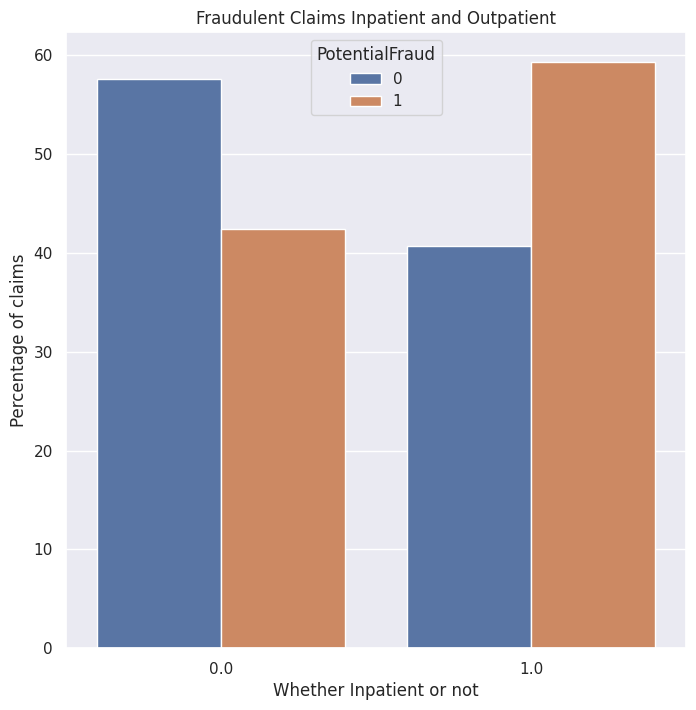

59.35003915426782% of inpatient claims are fraudulent
42.39674638128165% of outpatient claims are fraudulent


In [15]:

res = train_cleaned.groupby(['is_inpatient', 'PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,8))
ax = sns.barplot(x='is_inpatient', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims Inpatient and Outpatient')
plt.xlabel('Whether Inpatient or not')
plt.ylabel('Percentage of claims')
plt.show()

print("{}% of inpatient claims are fraudulent"\
      .format(res[(res.is_inpatient==1) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of outpatient claims are fraudulent"\
      .format(res[(res.is_inpatient==0) & (res.PotentialFraud==1)].Proportion.values[0]))

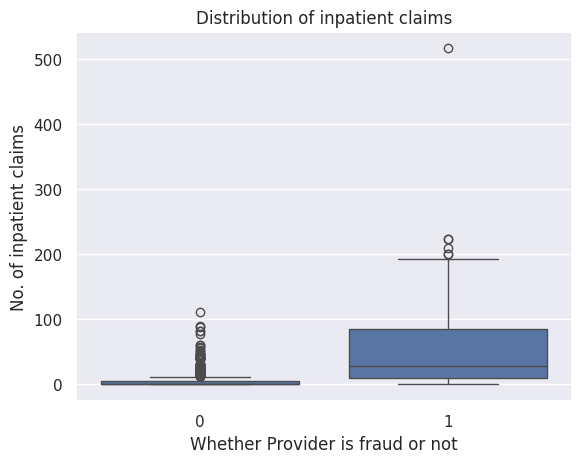

In [16]:

res1 = train_cleaned.groupby('Provider').is_inpatient.sum()\
                    .reset_index().rename(columns={'is_inpatient':'InpatientClaim_Count'})
res2 = train_cleaned[['Provider', 'PotentialFraud']].drop_duplicates(subset='Provider')
res3 = res1.merge(res2, on='Provider', how='inner')
sns.boxplot(x='PotentialFraud', y='InpatientClaim_Count', data=res3)
plt.title('Distribution of inpatient claims')
plt.xlabel('Whether Provider is fraud or not')
plt.ylabel('No. of inpatient claims');

<ipython-input-26-17312e8f3a58>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})


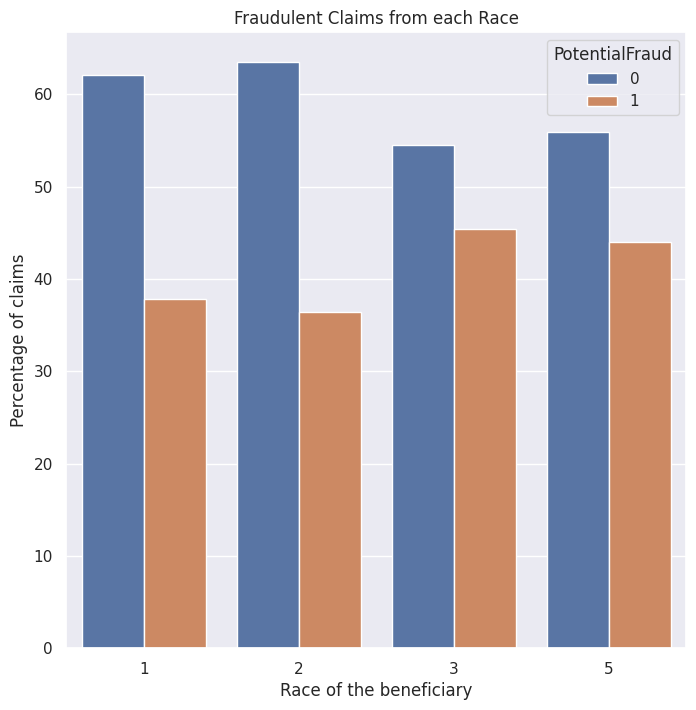

37.86228653436255% of claims for Race 1 are fraudulent
36.455787203450754% of claims for Race 2 are fraudulent
45.457773269084456% of claims for Race 3 are fraudulent
44.035532994923855% of claims for Race 5 are fraudulent


In [26]:
res = train_cleaned.groupby(['Race','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})
plt.figure(figsize=(8,8))
ax = sns.barplot(x='Race', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims from each Race')
plt.xlabel('Race of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()

print("{}% of claims for Race 1 are fraudulent"\
      .format(res[(res.Race==1) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of claims for Race 2 are fraudulent"\
      .format(res[(res.Race==2) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of claims for Race 3 are fraudulent"\
      .format(res[(res.Race==3) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of claims for Race 5 are fraudulent"\
      .format(res[(res.Race==5) & (res.PotentialFraud==1)].Proportion.values[0]))

In [27]:

# Dropping Race column
train_cleaned.drop(['Race'], axis=1, inplace=True)
print("Dropped Race column succesfully.")

Dropped Race column succesfully.


<ipython-input-28-25529935b303>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\


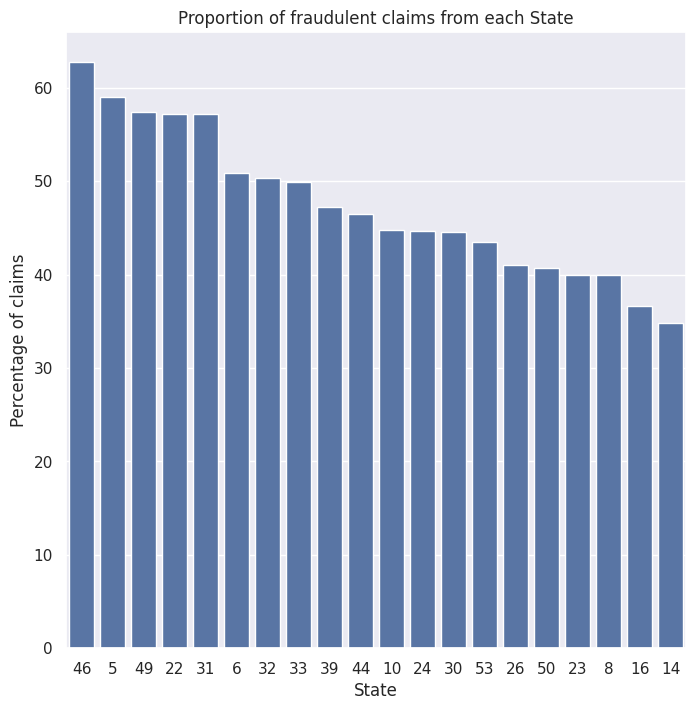

Total no. of states 52


In [28]:
res = train_cleaned.groupby(['State','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\
                          .reset_index().rename(columns={'ClaimID':'Proportion'})

# Extracting proportion of fraudulent claims from each state
res = res[res.PotentialFraud==1].sort_values(by=['Proportion'], ascending=False)
top20 = res[:20]
plt.figure(figsize=(8,8))
ax = sns.barplot(x='State', y='Proportion', 
                 order=top20.sort_values(by=['Proportion'], ascending=False).State.values, data=top20)
plt.title('Proportion of fraudulent claims from each State')
plt.xlabel('State')
plt.ylabel('Percentage of claims')
plt.show()

print("Total no. of states", len(res))

In [29]:
# Dropping State column
train_cleaned.drop(['State'], axis=1, inplace=True)
print("Dropped State column successfully.")

Dropped State column successfully.


<ipython-input-30-c36926340405>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\


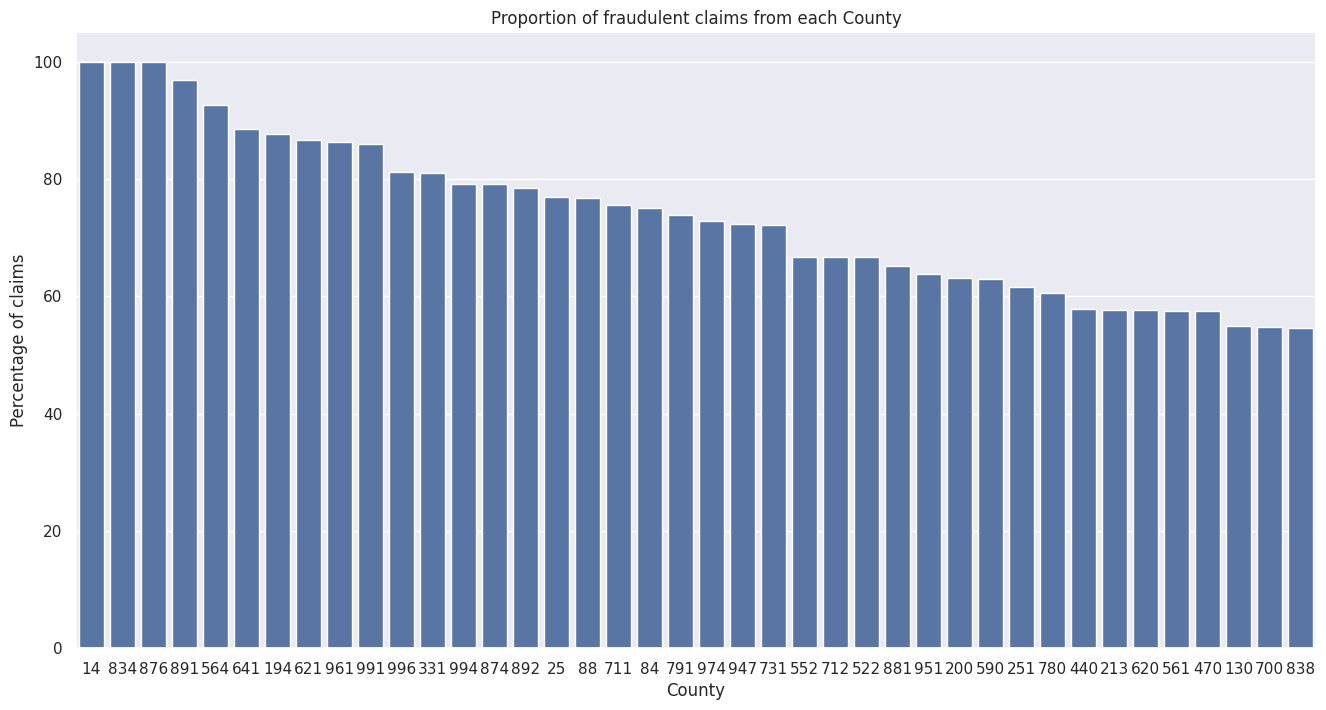

Total no. of counties 271
Total no. of counties with more thatn 50% frauds: 49


In [30]:
res = train_cleaned.groupby(['County','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\
                          .reset_index().rename(columns={'ClaimID':'Proportion'})

# Extracting proportion of fraudulent claims from each County
res = res[res.PotentialFraud==1].sort_values(by=['Proportion'], ascending=False)
top40 = res[:40]
plt.figure(figsize=(16,8))
ax = sns.barplot(x='County', y='Proportion', 
                 order=top40.sort_values(by=['Proportion'], ascending=False).County.values, data=top40)
plt.title('Proportion of fraudulent claims from each County')
plt.xlabel('County')
plt.ylabel('Percentage of claims')
plt.show()

print("Total no. of counties", len(res))
print("Total no. of counties with more thatn 50% frauds:", len(res[res.Proportion>50]))

In [31]:
train_cleaned.drop(['County'], axis=1, inplace=True)
print("Dropped County column successful")

Dropped County column successful


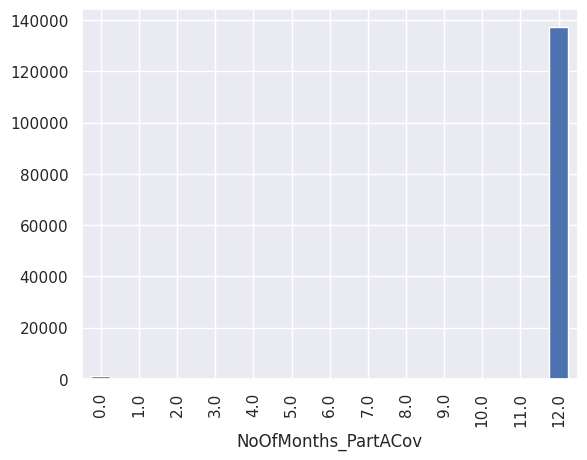

In [32]:

res = train_cleaned.groupby('BeneID').NoOfMonths_PartACov.mean().reset_index()
res.groupby('NoOfMonths_PartACov').BeneID.count().plot.bar();

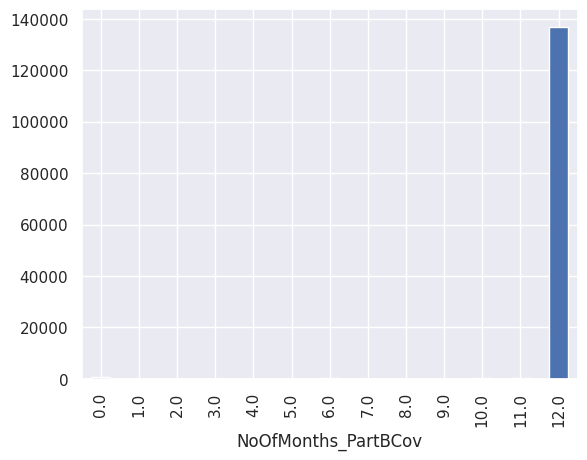

In [33]:

res = train_cleaned.groupby('BeneID').NoOfMonths_PartBCov.mean().reset_index()
res.groupby('NoOfMonths_PartBCov').BeneID.count().plot.bar();

In [34]:

# Dropping NoOfMonths_PartBCov and NoOfMonths_PartACov
train_cleaned.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)
print("Dropped NoOfMonths_PartBCov and NoOfMonths_PartBCov successfully")

Dropped NoOfMonths_PartBCov and NoOfMonths_PartBCov successfully


In [35]:

# Dropping ClaimStartSt and ClaimEndDt
train_cleaned.drop(['ClaimStartDt', 'ClaimEndDt'], axis=1, inplace=True)
print("Dropped ClaimStartDt and ClaimEndDt successfully.")

Dropped ClaimStartDt and ClaimEndDt successfully.


In [36]:

# Dropping Physician ids columns 
train_cleaned.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis=1, inplace=True)
print("Dropped Physician Ids successfully.")

Dropped Physician Ids successfully.


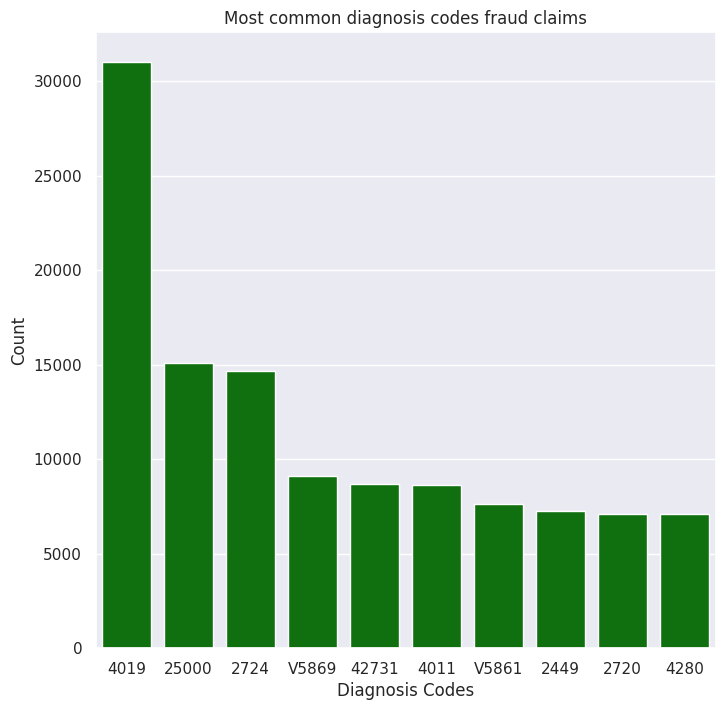

In [37]:

# List of all diagnosis codes used for fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==1]
all_diagnosis = pd.DataFrame()
all_diagnosis['diagnosis_codes'] = pd.concat([res['ClmDiagnosisCode_1'], res['ClmDiagnosisCode_2'],res['ClmDiagnosisCode_3'],
                                             res['ClmDiagnosisCode_4'],res['ClmDiagnosisCode_5'], res['ClmDiagnosisCode_6'],
                                             res['ClmDiagnosisCode_7'], res['ClmDiagnosisCode_8'],res['ClmDiagnosisCode_9'],
                                             res['ClmDiagnosisCode_10']], axis=0).dropna()

top10_fraud = all_diagnosis['diagnosis_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='diagnosis_codes', data=top10_fraud, color='green')
plt.title('Most common diagnosis codes fraud claims')
plt.xlabel('Diagnosis Codes')
plt.ylabel('Count');

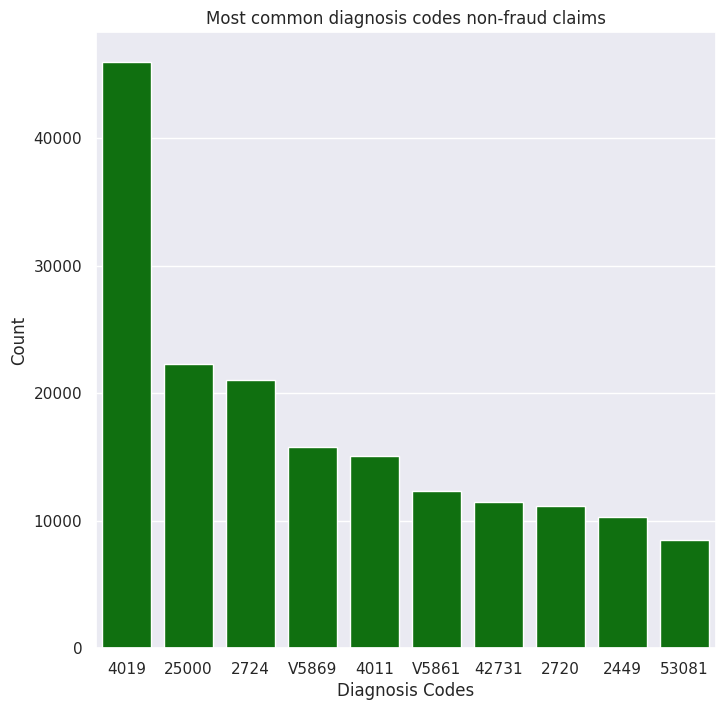

In [38]:

# List of all diagnosis codes used for non fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==0]
all_diagnosis = pd.DataFrame()
all_diagnosis['diagnosis_codes'] = pd.concat([res['ClmDiagnosisCode_1'], res['ClmDiagnosisCode_2'],res['ClmDiagnosisCode_3'],
                                             res['ClmDiagnosisCode_4'],res['ClmDiagnosisCode_5'], res['ClmDiagnosisCode_6'],
                                             res['ClmDiagnosisCode_7'], res['ClmDiagnosisCode_8'],res['ClmDiagnosisCode_9'],
                                             res['ClmDiagnosisCode_10']], axis=0).dropna()

top10_nonfraud = all_diagnosis['diagnosis_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='diagnosis_codes', data=top10_nonfraud, color='green')
plt.title('Most common diagnosis codes non-fraud claims')
plt.xlabel('Diagnosis Codes')
plt.ylabel('Count');

In [39]:

print("Diagnosis codes common in fraud and non fraud claims:"), 
print(set(top10_fraud['index']).intersection(set(top10_nonfraud['index'])))

Diagnosis codes common in fraud and non fraud claims:
{'2720', '2449', 'V5861', '2724', 'V5869', '42731', '4011', '4019', '25000'}


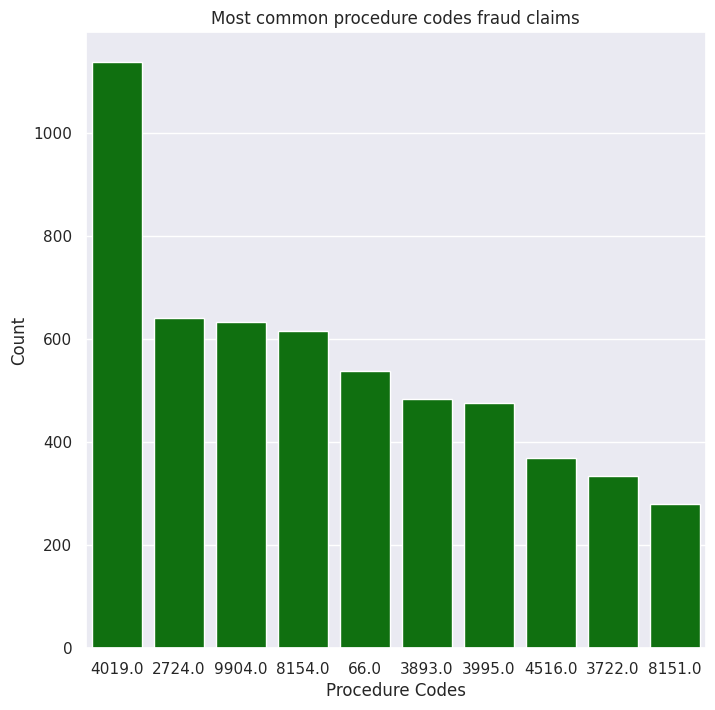

In [40]:

# List of all procedure codes used for fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==1]
all_procedures = pd.DataFrame()
all_procedures['procedure_codes'] = pd.concat([res['ClmProcedureCode_1'], res['ClmProcedureCode_2'],res['ClmProcedureCode_3'],
                                               res['ClmProcedureCode_4'],res['ClmProcedureCode_5'], res['ClmProcedureCode_6']],
                                               axis=0).dropna()

top10_fraud = all_procedures['procedure_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='procedure_codes', data=top10_fraud, 
            color='green', order=top10_fraud.sort_values('procedure_codes', ascending=False)['index'])
plt.title('Most common procedure codes fraud claims')
plt.xlabel('Procedure Codes')
plt.ylabel('Count');

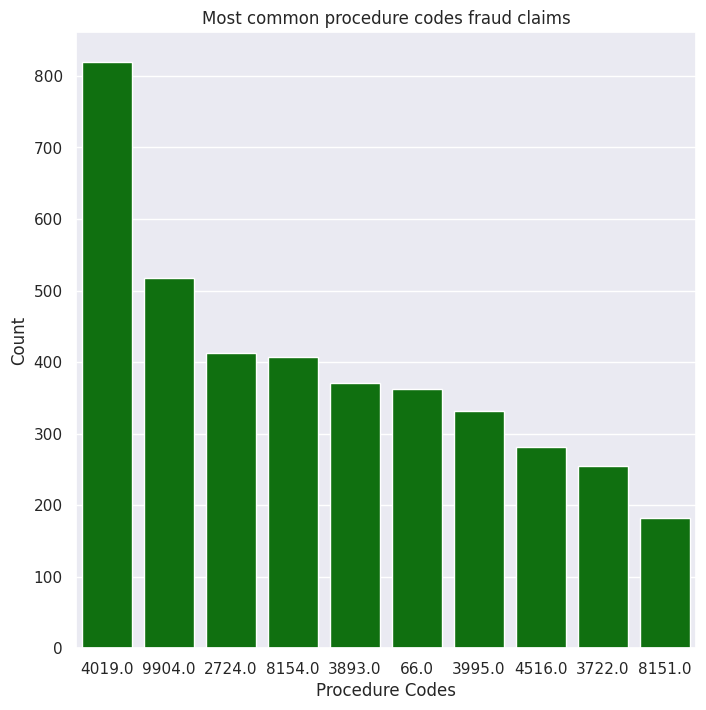

In [41]:

# List of all procedure codes used for non fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==0]
all_procedures = pd.DataFrame()
all_procedures['procedure_codes'] = pd.concat([res['ClmProcedureCode_1'], res['ClmProcedureCode_2'],res['ClmProcedureCode_3'],
                                               res['ClmProcedureCode_4'],res['ClmProcedureCode_5'], res['ClmProcedureCode_6']],
                                               axis=0).dropna()

top10_nonfraud = all_procedures['procedure_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='procedure_codes', data=top10_nonfraud, 
            color='green', order=top10_nonfraud.sort_values('procedure_codes', ascending=False)['index'])
plt.title('Most common procedure codes fraud claims')
plt.xlabel('Procedure Codes')
plt.ylabel('Count');

In [42]:

print("Procedure codes common in fraud and non fraud claims:"), 
print(set(top10_fraud['index']).intersection(set(top10_nonfraud['index'])))

Procedure codes common in fraud and non fraud claims:
{66.0, 2724.0, 4516.0, 3722.0, 9904.0, 4019.0, 3893.0, 8151.0, 8154.0, 3995.0}


In [43]:

# Dropping Claim diagnosis codes and Procedure codes
train_cleaned.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'], axis=1, inplace=True)
print("Droped claim diagnosis codes and procedure codes successfully.")

Droped claim diagnosis codes and procedure codes successfully.


In [44]:

train_cleaned.drop(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode'], axis=1, inplace=True)
print("Dropped ClmAdmitDiagnosisCode and DiagnosisGroupCode successfully.")

Dropped ClmAdmitDiagnosisCode and DiagnosisGroupCode successfully.


In [45]:

train_cleaned.drop(['AdmissionDt', 'DischargeDt'], axis=1, inplace=True)
print("Dropped AdmissionDt and DischargeDt successfully.")

Dropped AdmissionDt and DischargeDt successfully.


<ipython-input-46-9fc446c04ed2>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})


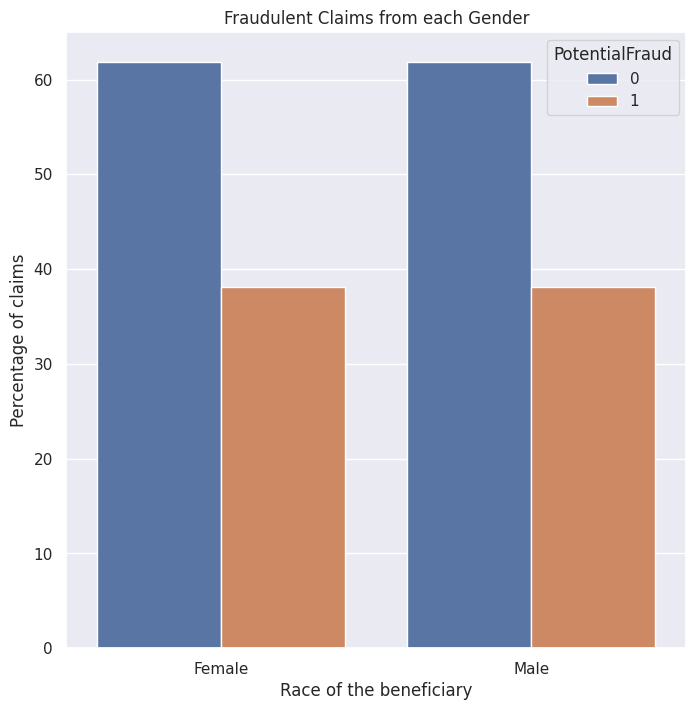

In [46]:

res = train_cleaned.groupby(['Gender','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})
plt.figure(figsize=(8,8))
ax = sns.barplot(x='Gender', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims from each Gender')
plt.xlabel('Race of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()

In [47]:

# Dropping Gender column
train_cleaned.drop(['Gender'], axis=1, inplace=True)
print("Dropped Gender column successfully")

Dropped Gender column successfully


In [48]:
train_cleaned.head()

,Provider,PotentialFraud,BeneID,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,is_inpatient,Age,is_dead,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Claim_Period,Total_ProcedureCodes,ClaimPeriod_greater_DaysAdmitted,is_groupcode,is_claimcode,is_deductible
0,PRV51001,0,BENE11727,1,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,20,0.0,0,79,0,0,6,2,2,0,0,0,0,0,1
1,PRV51001,0,BENE24646,0,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,700,0.0,0,66,0,0,5,2,6,1,0,1,0,0,1
2,PRV51001,0,BENE31617,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,900,0.0,0,76,0,0,4,1,1,0,0,0,0,1,1
3,PRV51001,0,BENE32715,0,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,500,0.0,0,73,0,0,8,2,6,1,0,1,0,1,1
4,PRV51001,0,BENE36012,0,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,CLM58316,36000,1068.0,1,69,0,4,6,1,8,4,0,0,1,1,1


In [49]:
train_cleaned.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'is_inpatient', 'Age', 'is_dead', 'Days_Admitted',
       'Diseases_Count', 'Total_Physicians', 'Total_ClaimCodes',
       'Claim_Period', 'Total_ProcedureCodes',
       'ClaimPeriod_greater_DaysAdmitted', 'is_groupcode', 'is_claimcode',
       'is_deductible'],
      dtype='object')

In [50]:

# Storing the target variable of each Provider Id
output_train = train_cleaned[['Provider', 'PotentialFraud']].drop_duplicates(subset='Provider')

# Grouping columns with aggregation=count on Provider column
bene_count = train_cleaned.groupby('Provider').BeneID.nunique().reset_index().rename(columns={'BeneID':'Beneficiaries_Count'})
claim_count = train_cleaned.groupby('Provider').ClaimID.nunique().reset_index().rename(columns={'ClaimID':'Claims_Count'})
agg_count_data = bene_count.merge(claim_count, on='Provider', how='inner')

# Grouping columns with aggregation=sum on Provider column
agg_sum_data = train_cleaned.groupby('Provider')[['RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'is_inpatient', 'is_dead', 'is_claimcode',
        'is_groupcode', 'is_deductible', 'ClaimPeriod_greater_DaysAdmitted']].sum().reset_index()

# Grouping columns with aggregate=mean on Provider column
agg_mean_data = train_cleaned.groupby('Provider')[['IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Age', 'Days_Admitted',
       'Diseases_Count', 'Total_Physicians', 'Total_ClaimCodes',
       'Total_ProcedureCodes', 'Claim_Period']].mean().reset_index()

# Merging all aggregated groups and target column
train_grouped = agg_count_data.merge(agg_sum_data, on='Provider', how='inner')\
                         .merge(agg_mean_data, on='Provider', how='inner')\
                         .merge(output_train, on='Provider', how='inner')
print("Shape: ", train_grouped.shape)
train_grouped.head()

Shape:  (5410, 35)


,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Total_ProcedureCodes,Claim_Period,PotentialFraud
0,PRV51001,24,25,8,15,19,17,5,10,9,21,23,6,8,6,5,0,11,5,25,3,17606.000000,897.120000,2615.200000,463.920000,4185.600000,213.600000,78.280000,1.000000,5.560000,1.600000,3.200000,0.120000,1.440000,0
1,PRV51003,117,132,29,56,80,64,10,41,54,100,112,33,38,12,62,1,78,62,132,12,7568.181818,931.424242,2678.181818,737.121212,4588.409091,502.166667,69.553030,2.424242,4.545455,1.530303,5.250000,0.363636,3.674242,1
2,PRV51004,138,149,23,64,88,50,16,41,63,105,108,49,46,17,0,1,28,0,149,21,4351.879195,434.953020,2194.899329,622.751678,350.134228,2.080537,71.812081,0.000000,4.342282,1.604027,2.583893,0.000000,1.429530,0
3,PRV51005,495,1165,259,426,680,507,165,295,485,799,895,344,331,124,0,4,252,0,1165,124,3623.991416,379.162232,2109.733906,636.328755,241.124464,3.175966,70.000858,0.000000,4.335622,1.599142,2.588841,0.000000,1.088412,1
4,PRV51007,58,72,11,26,40,22,12,16,29,49,51,21,22,12,3,1,17,3,72,4,3050.000000,445.000000,1729.722222,469.722222,468.194444,45.333333,68.791667,0.222222,4.166667,1.527778,2.986111,0.013889,0.958333,0


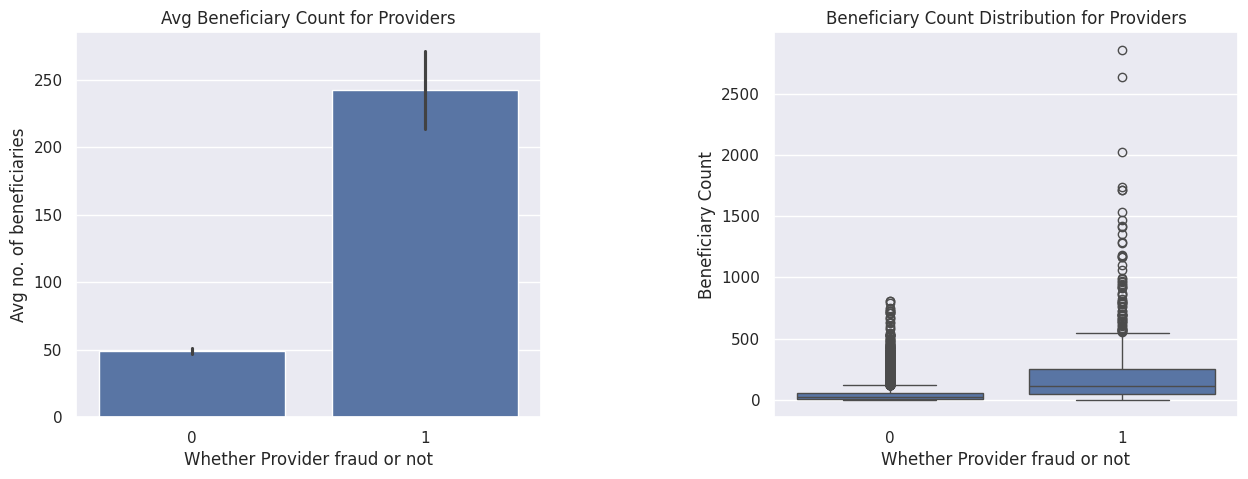

In [51]:

f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Beneficiaries_Count', data=train_grouped)
plt.title("Avg Beneficiary Count for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of beneficiaries")

plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='Beneficiaries_Count', data=train_grouped)
plt.title("Beneficiary Count Distribution for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Beneficiary Count")
plt.subplots_adjust(wspace=0.5)
plt.show()

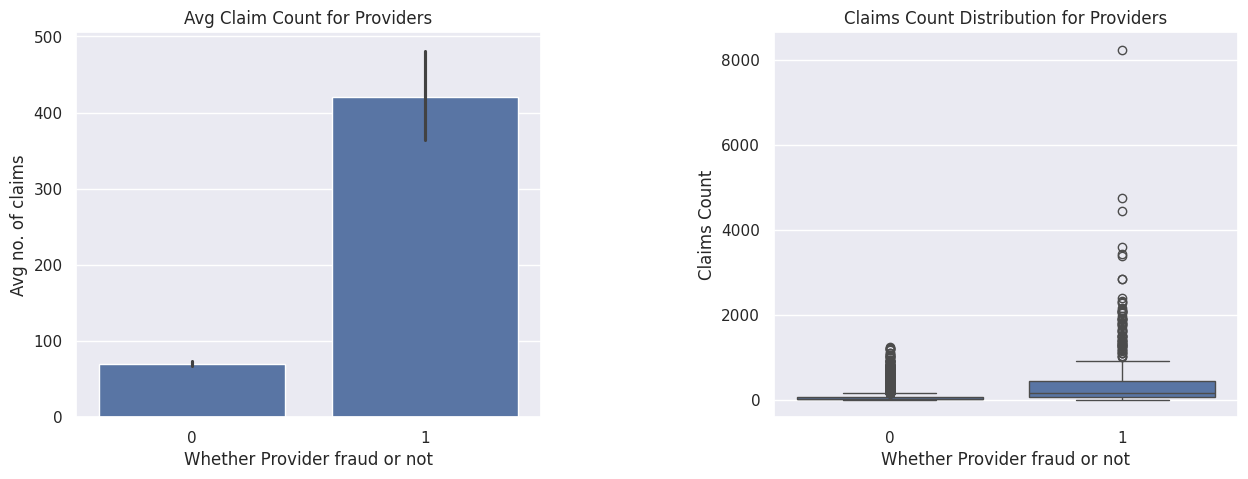

In [52]:

f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Claims_Count', data=train_grouped)
plt.title("Avg Claim Count for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claims")

plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='Claims_Count', data=train_grouped)
plt.title("Claims Count Distribution for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Claims Count")
plt.subplots_adjust(wspace=0.5)
plt.show()

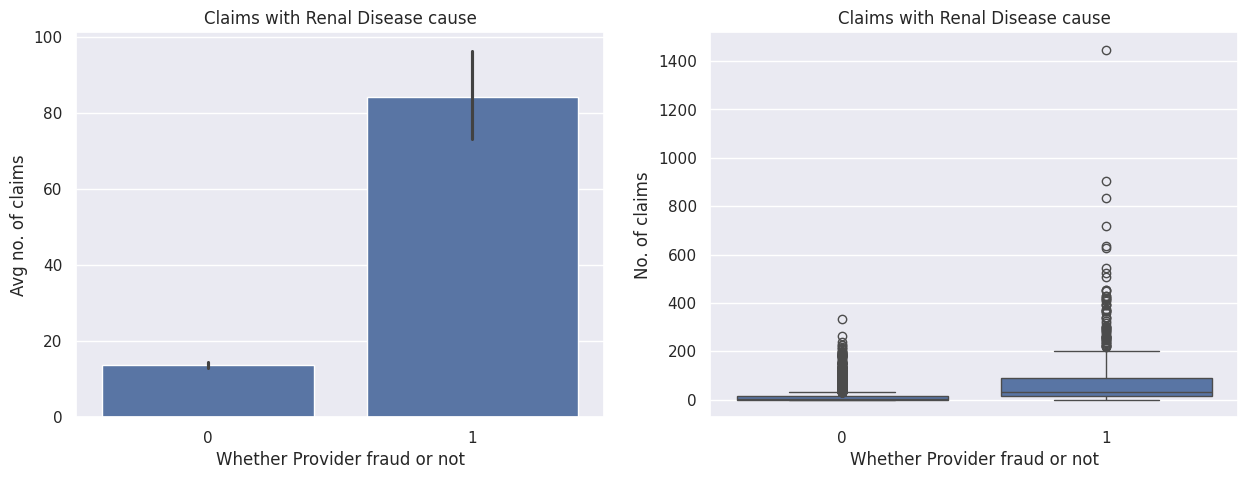

In [53]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='RenalDiseaseIndicator', data=train_grouped)
plt.title("Claims with Renal Disease cause")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claims")
plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='RenalDiseaseIndicator', data=train_grouped)
plt.title("Claims with Renal Disease cause")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("No. of claims")
plt.show()

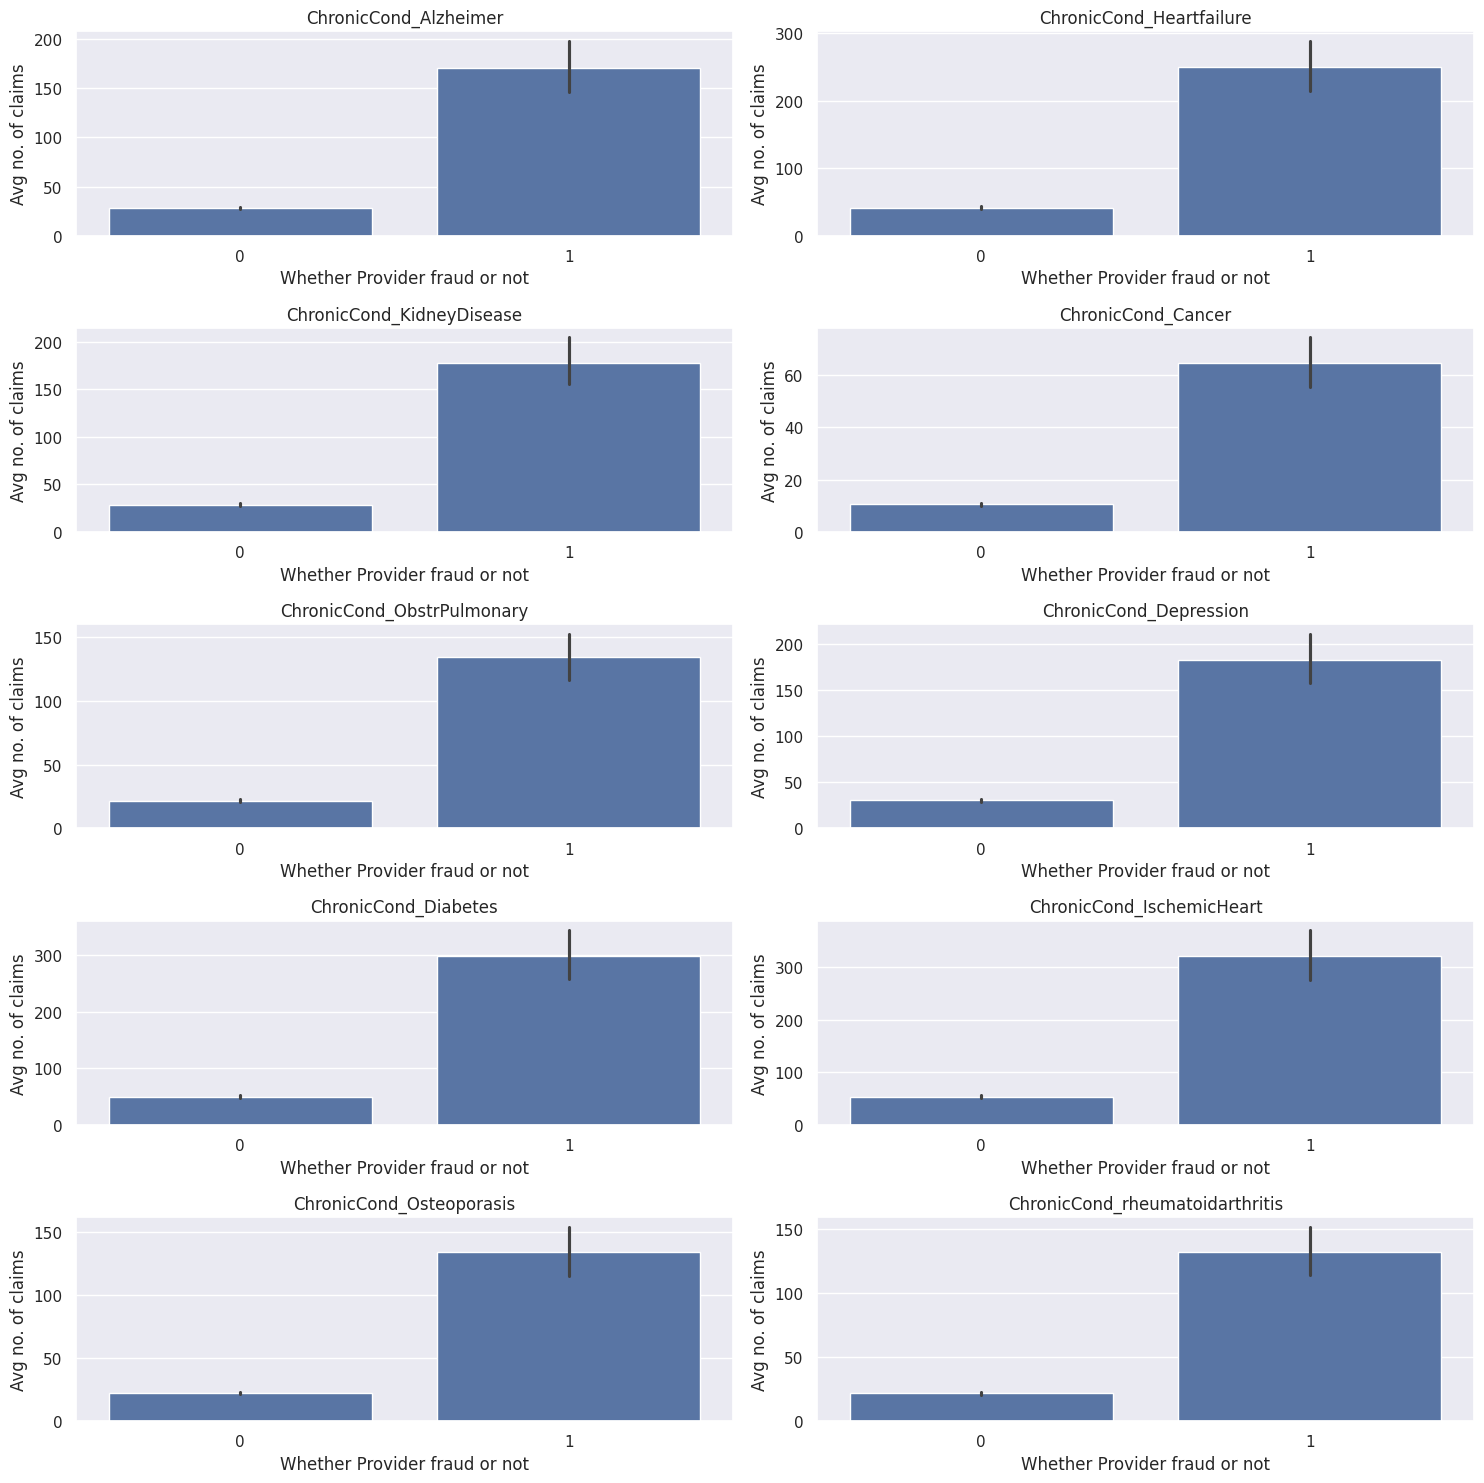

In [54]:
f, axs = plt.subplots(5,2, figsize=(15,15))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    col = train_grouped.columns[3+i]
    sns.barplot(x='PotentialFraud', y=col, data=train_grouped)
    plt.title(col)
    plt.xlabel("Whether Provider fraud or not")
    plt.ylabel("Avg no. of claims")

f.tight_layout()
plt.show()

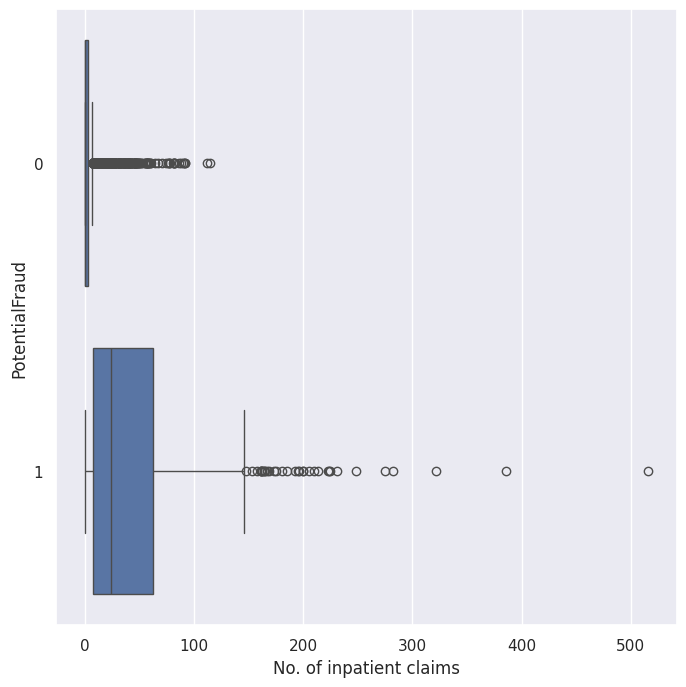

In [55]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_inpatient', y="PotentialFraud", data=train_grouped, orient="h")
plt.xlabel("No. of inpatient claims")
plt.show()

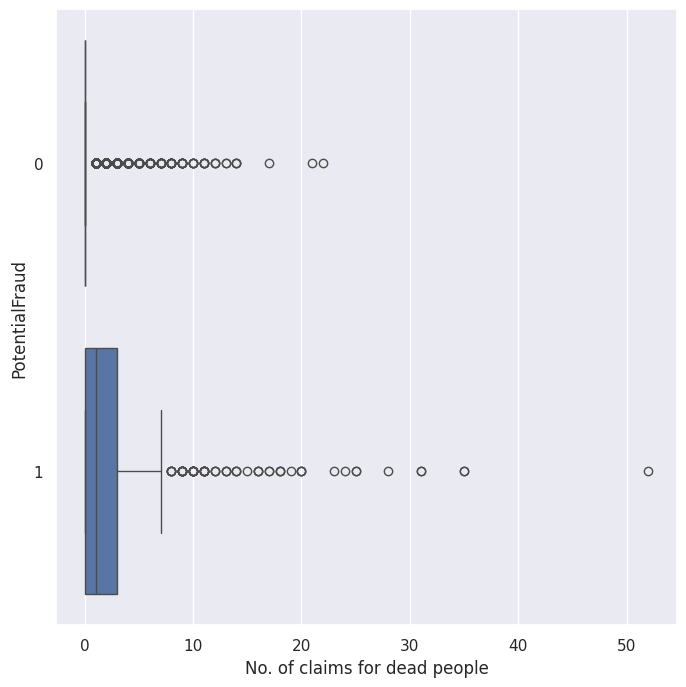

In [56]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_dead', y="PotentialFraud", data=train_grouped, orient="h")
plt.xlabel("No. of claims for dead people")
plt.show()

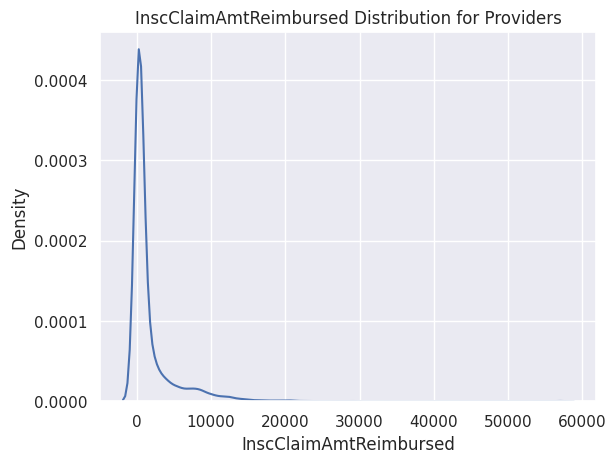

99.0th percentile of avg. insurance claim amount: 14987.142857142837
99.1th percentile of avg. insurance claim amount: 15515.949999999975
99.2th percentile of avg. insurance claim amount: 16261.501538461547
99.3th percentile of avg. insurance claim amount: 17030.44444444438
99.4th percentile of avg. insurance claim amount: 18182.00000000009
99.5th percentile of avg. insurance claim amount: 19318.333333333307
99.6th percentile of avg. insurance claim amount: 20436.399999999958
99.7th percentile of avg. insurance claim amount: 21773.00000000014
99.8th percentile of avg. insurance claim amount: 26181.99999999979
99.9th percentile of avg. insurance claim amount: 30773.000000001048


In [57]:
sns.kdeplot(x='InscClaimAmtReimbursed', data=train_grouped)
plt.title("InscClaimAmtReimbursed Distribution for Providers")
plt.xlabel("InscClaimAmtReimbursed")
plt.ylabel("Density")
plt.show()

for i in range(10):
    print("{}th percentile of avg. insurance claim amount: {}"\
          .format(99+i/10, np.percentile(train_grouped['InscClaimAmtReimbursed'], 99+i/10)))

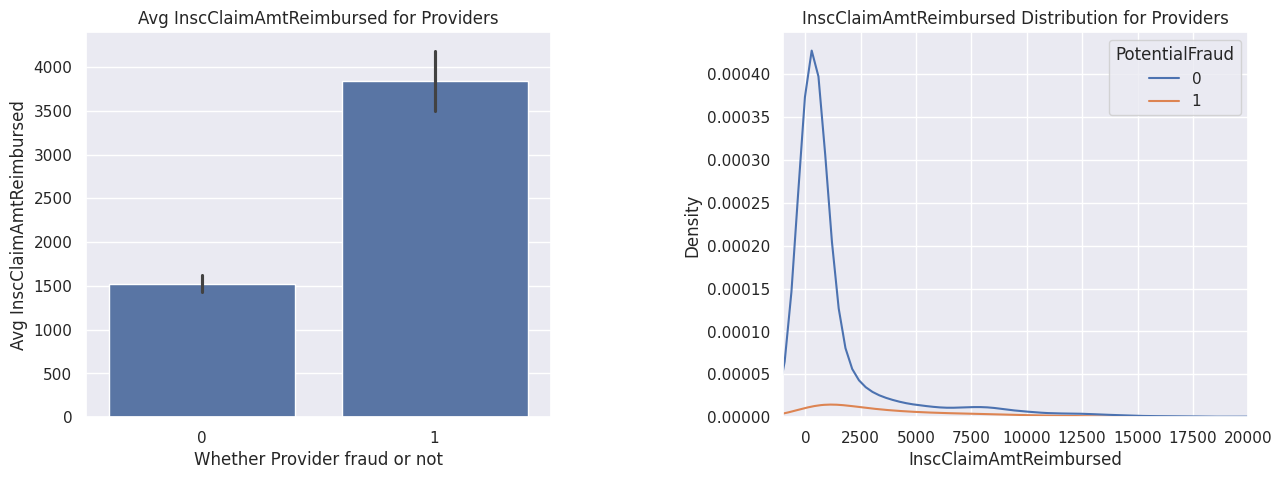

In [58]:

f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=train_grouped)
plt.title("Avg InscClaimAmtReimbursed for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg InscClaimAmtReimbursed")

plt.subplot(1,2,2)
sns.kdeplot(x='InscClaimAmtReimbursed', hue='PotentialFraud', data=train_grouped)
plt.xlim(-1000, 20000)
plt.title("InscClaimAmtReimbursed Distribution for Providers")
plt.xlabel("InscClaimAmtReimbursed")
plt.ylabel("Density")
plt.subplots_adjust(wspace=0.5)
plt.show()

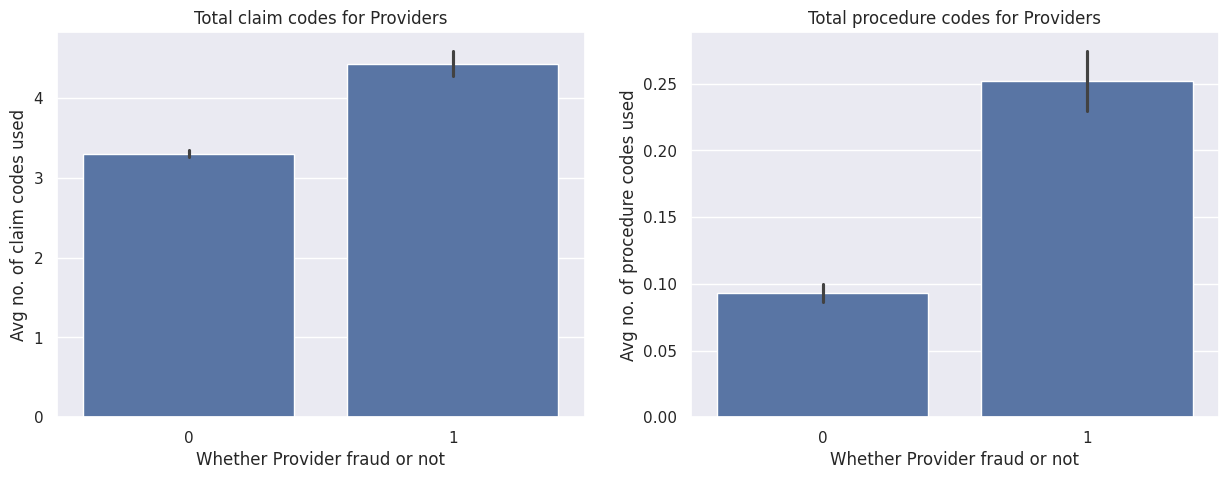

In [59]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Total_ClaimCodes', data=train_grouped)
plt.title("Total claim codes for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claim codes used")

plt.subplot(1,2,2)
sns.barplot(x='PotentialFraud', y='Total_ProcedureCodes', data=train_grouped)
plt.title("Total procedure codes for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of procedure codes used")
plt.show()

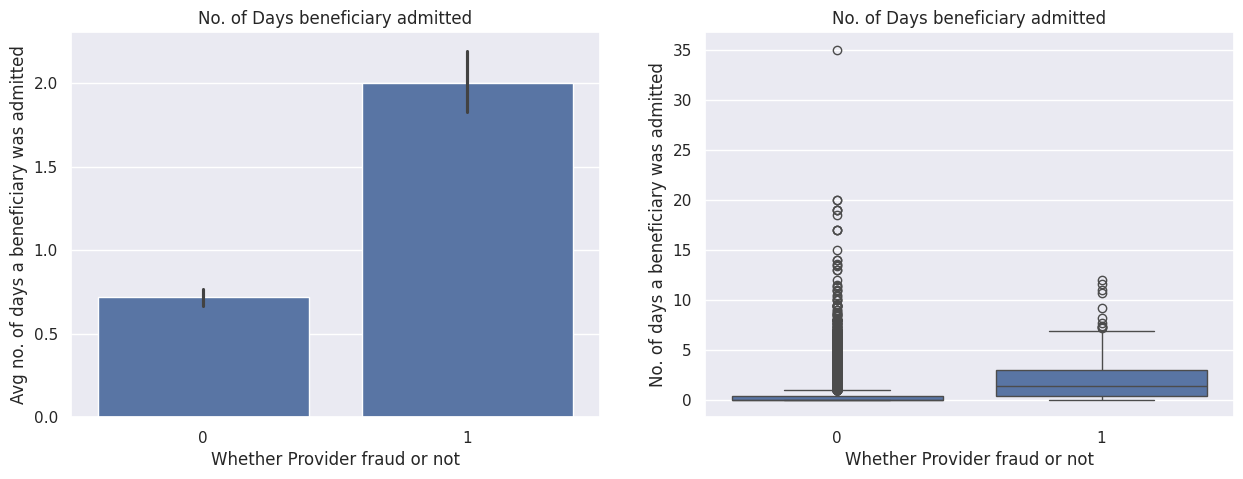

In [60]:

f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Days_Admitted', data=train_grouped)
plt.title("No. of Days beneficiary admitted")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of days a beneficiary was admitted")
plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='Days_Admitted', data=train_grouped)
plt.title("No. of Days beneficiary admitted")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("No. of days a beneficiary was admitted")
plt.show()

In [61]:
train_grouped.columns

Index(['Provider', 'Beneficiaries_Count', 'Claims_Count',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'is_inpatient',
       'is_dead', 'is_claimcode', 'is_groupcode', 'is_deductible',
       'ClaimPeriod_greater_DaysAdmitted', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Age', 'Days_Admitted', 'Diseases_Count', 'Total_Physicians',
       'Total_ClaimCodes', 'Total_ProcedureCodes', 'Claim_Period',
       'PotentialFraud'],
      dtype='object')

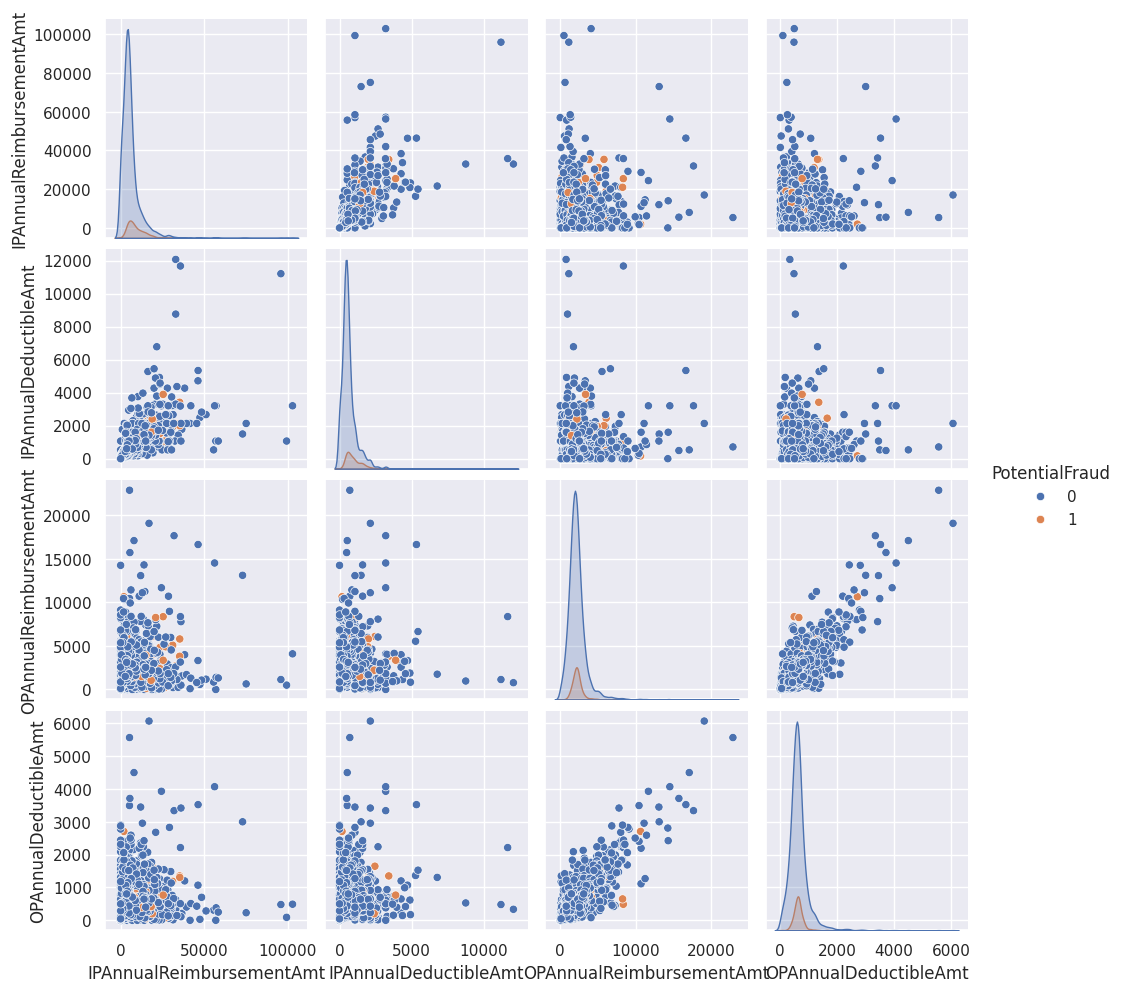

In [62]:

# Pair plot to find impact of these continuous features on target variable i.e PotentialFraud
data = train_grouped[['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                      'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','PotentialFraud']]
sns.pairplot(data, hue='PotentialFraud')
plt.show()

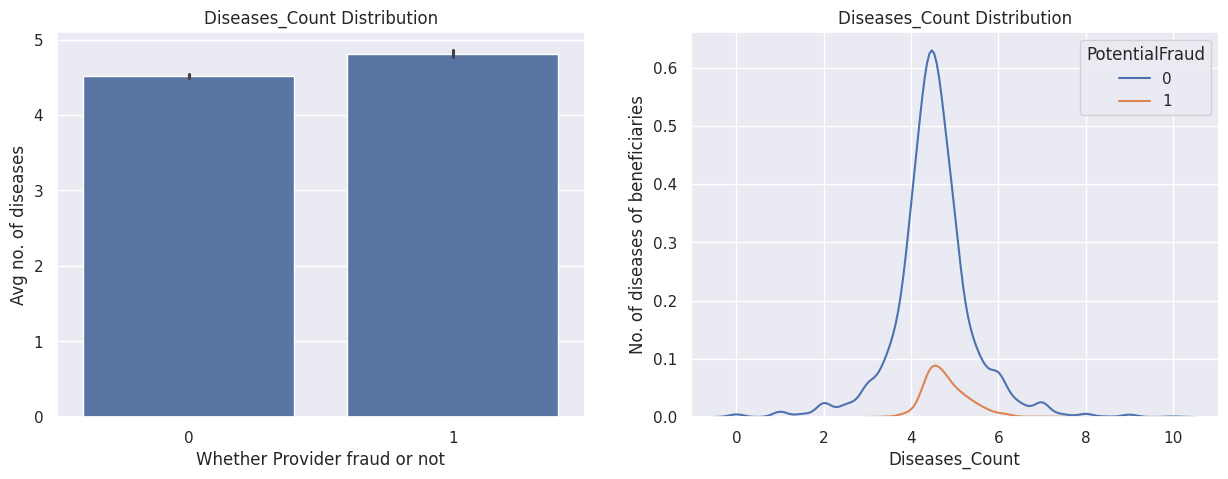

In [63]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Diseases_Count', data=train_grouped)
plt.title("Diseases_Count Distribution")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of diseases")
plt.subplot(1,2,2)
sns.kdeplot(x='Diseases_Count', hue='PotentialFraud', data=train_grouped)
plt.title("Diseases_Count Distribution")
plt.ylabel("No. of diseases of beneficiaries")
plt.show()

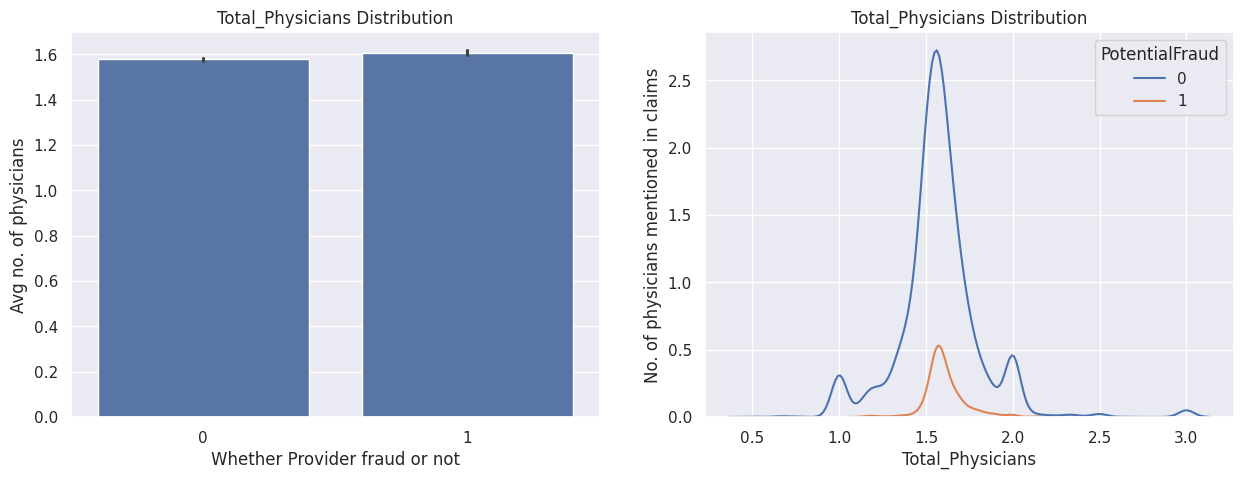

In [64]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Total_Physicians', data=train_grouped)
plt.title("Total_Physicians Distribution")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of physicians")
plt.subplot(1,2,2)
sns.kdeplot(x='Total_Physicians', hue='PotentialFraud', data=train_grouped)
plt.title("Total_Physicians Distribution")
plt.ylabel("No. of physicians mentioned in claims")
plt.show()

In [65]:
print("Training Data Shape: ", train_grouped.shape)
train_grouped.head()

Training Data Shape:  (5410, 35)


,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Total_ProcedureCodes,Claim_Period,PotentialFraud
0,PRV51001,24,25,8,15,19,17,5,10,9,21,23,6,8,6,5,0,11,5,25,3,17606.000000,897.120000,2615.200000,463.920000,4185.600000,213.600000,78.280000,1.000000,5.560000,1.600000,3.200000,0.120000,1.440000,0
1,PRV51003,117,132,29,56,80,64,10,41,54,100,112,33,38,12,62,1,78,62,132,12,7568.181818,931.424242,2678.181818,737.121212,4588.409091,502.166667,69.553030,2.424242,4.545455,1.530303,5.250000,0.363636,3.674242,1
2,PRV51004,138,149,23,64,88,50,16,41,63,105,108,49,46,17,0,1,28,0,149,21,4351.879195,434.953020,2194.899329,622.751678,350.134228,2.080537,71.812081,0.000000,4.342282,1.604027,2.583893,0.000000,1.429530,0
3,PRV51005,495,1165,259,426,680,507,165,295,485,799,895,344,331,124,0,4,252,0,1165,124,3623.991416,379.162232,2109.733906,636.328755,241.124464,3.175966,70.000858,0.000000,4.335622,1.599142,2.588841,0.000000,1.088412,1
4,PRV51007,58,72,11,26,40,22,12,16,29,49,51,21,22,12,3,1,17,3,72,4,3050.000000,445.000000,1729.722222,469.722222,468.194444,45.333333,68.791667,0.222222,4.166667,1.527778,2.986111,0.013889,0.958333,0


In [66]:

train_grouped.corr()[['PotentialFraud']].sort_values(by='PotentialFraud', ascending=False)

<ipython-input-66-2c23a23daf73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_grouped.corr()[['PotentialFraud']].sort_values(by='PotentialFraud', ascending=False)


,PotentialFraud
PotentialFraud,1.000000
is_inpatient,0.525393
is_groupcode,0.525393
is_claimcode,0.480347
ChronicCond_stroke,0.399206
ChronicCond_ObstrPulmonary,0.396191
ChronicCond_KidneyDisease,0.394239
Beneficiaries_Count,0.393531
RenalDiseaseIndicator,0.391002
ChronicCond_Heartfailure,0.384131


In [67]:
train_grouped.to_csv("finalPreProcessed_train_data.csv", index=False)
print("File Saved Successfully!")

File Saved Successfully!
